**Exploratory Data Analysis (EDA) and Data Preprocesing **

This notebook shows Exploratory Data Analysis (EDA) on  the dataset by analyzing the distribution of topic groups and document lengths, cleaning the text data, and generating visualizations such as word clouds for each category.
 This helps to understand the dataset's structure, identify key features, and visualize important patterns, which are crucial steps for effective data preprocessing and model preparation

**Data Understanding:**

Loading the dataset and displaying initial data information.

Performing EDA to understand the structure, distribution, and characteristics of the data.

In [ ]:
#importing necesary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from google.colab import files
import pandas as pd
from sklearn.utils import resample, shuffle


In [ ]:
#loading the data
data = pd.read_csv('Service_tickets.csv')
#displaying the first five rows of the dataset to get a quick overview of the data.
data.head()

,Document,Topic_group
0,connection with icon icon dear please setup ic...,Hardware
1,work experience user work experience user hi w...,Access
2,requesting for meeting requesting meeting hi p...,Hardware
3,reset passwords for external accounts re expir...,Access
4,mail verification warning hi has got attached ...,Miscellaneous


In [ ]:
#checking the size of the dataframe
data.shape

(47837, 2)

Displaying dataset information.

In [ ]:
# Displaying dataset information.
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47837 entries, 0 to 47836
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Document     47837 non-null  object
 1   Topic_group  47837 non-null  object
dtypes: object(2)
memory usage: 747.6+ KB
None


In [ ]:
#checking for missing values
data.isna().sum()

,0
Document,0
Topic_group,0


Visualizing and Analyzing the Distribution of Topic Groups

Distribution of Topic_group:
Topic_group
Hardware                 13617
HR Support               10915
Access                    7125
Miscellaneous             7060
Storage                   2777
Purchase                  2464
Internal Project          2119
Administrative rights     1760
Name: count, dtype: int64


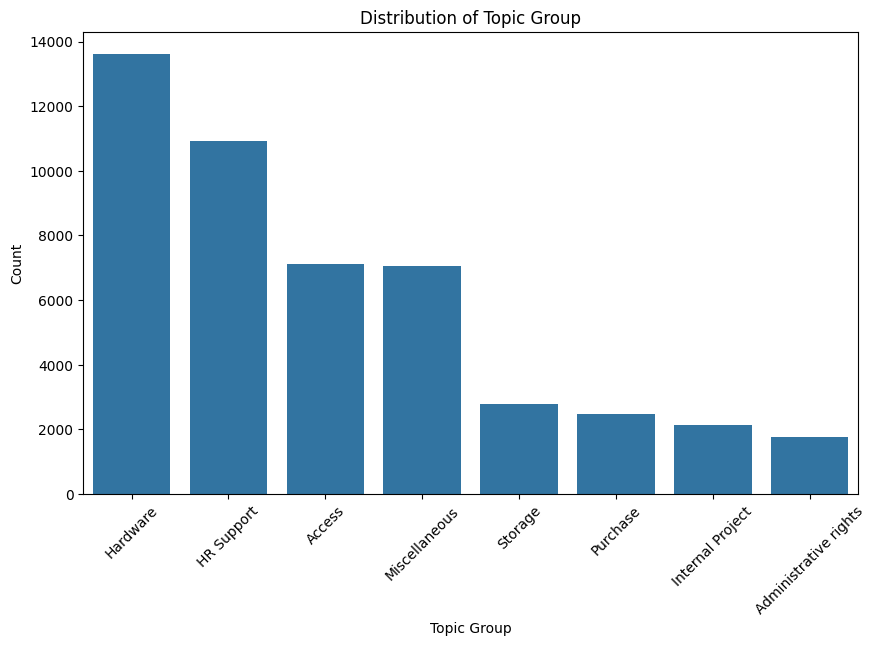

In [ ]:
# Displaying the class distribution
print("Distribution of Topic_group:")
print(data['Topic_group'].value_counts())

# Plotting class  distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Topic_group', data=data, order=data['Topic_group'].value_counts().index)
plt.title('Distribution of Topic Group')
plt.xticks(rotation=45)
plt.xlabel('Topic Group')
plt.ylabel('Count')
plt.show()

Analyzing and Visualizing the Distribution of Document Lengths by Character Count


Calculating Length of Each Document: To Understand the length of documents in dataset for  preprocessing steps, such as padding or truncation

                                            Document  text_length
0  connection with icon icon dear please setup ic...          111
1  work experience user work experience user hi w...          124
2  requesting for meeting requesting meeting hi p...           93
3  reset passwords for external accounts re expir...          948
4  mail verification warning hi has got attached ...          115
count    47837.000000
mean       291.873989
std        388.172619
min          7.000000
25%        110.000000
50%        175.000000
75%        304.000000
max       7015.000000
Name: text_length, dtype: float64


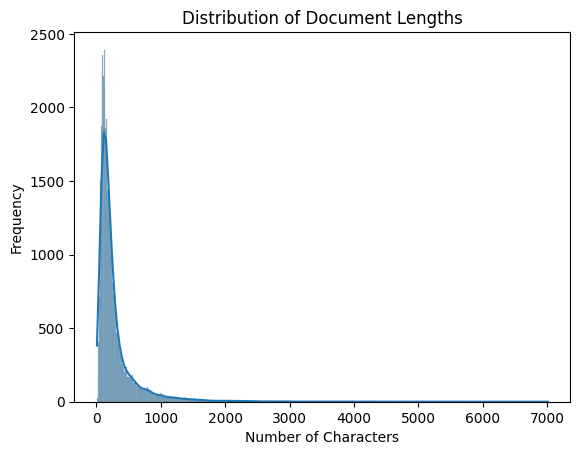

In [ ]:
# Calculating length of each document (number of characters)
data['text_length'] = data['Document'].apply(len)

# Displaying the first few rows to see the actual values
print(data[['Document', 'text_length']].head())

# Displaying basic statistics to see the overall summary
print(data['text_length'].describe())

# Visualizing the distribution of document lengths
sns.histplot(data['text_length'], kde=True)
plt.title('Distribution of Document Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()


**Data cleaning**

This step involves removing  non-alphabetic characters, Converting text to lowercase and removing stop words.

First  target variable , topic groups is encoded  into numeric format for prepration for the models.

In [ ]:
# Importing the stopwords corpus
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

# Extending the default NLTK stopwords list with additional stopwords
stop_words = set(stopwords.words('english'))
additional_stopwords = {'hi', 'please', 'thank','for', 'thanks', 'hello', 'regards', 'pm'}
stop_words = stop_words.union(additional_stopwords) # Use .union() with a set as the argument


# Creating a function for text cleaning
def clean_text(text):
    text = text.lower()  # Converting text to lowercase
    text = re.sub('[^a-zA-Z\s]', '', text)  # Removing symbols
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Removing stopwords
    return text

# Applying cleaning function to the 'Document' column
data['Cleaned_Document'] = data['Document'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data.head()

,Document,Topic_group,text_length,Cleaned_Document
0,connection with icon icon dear please setup ic...,Hardware,111,connection icon icon dear setup icon per icon ...
1,work experience user work experience user hi w...,Access,124,work experience user work experience user work...
2,requesting for meeting requesting meeting hi p...,Hardware,93,requesting meeting requesting meeting help fol...
3,reset passwords for external accounts re expir...,Access,948,reset passwords external accounts expire days ...
4,mail verification warning hi has got attached ...,Miscellaneous,115,mail verification warning got attached address...


In [ ]:


#Redficing the dataset to have the 'Cleaned_Document' and 'Topic_group' columns
data = data[['Cleaned_Document', 'Topic_group']]
data.head()

,Cleaned_Document,Topic_group
0,connection icon icon dear setup icon per icon ...,Hardware
1,work experience user work experience user work...,Access
2,requesting meeting requesting meeting help fol...,Hardware
3,reset passwords external accounts expire days ...,Access
4,mail verification warning got attached address...,Miscellaneous


In [ ]:
data.shape

(47837, 2)

Extracting and Displaying the Top 10 Most Frequent Words by Category

In [ ]:
# Function to get the top 10 words for each category
from collections import Counter # Import the Counter class
def get_top_words(category, text):
    words = text.split()
    word_freq = Counter(words)
    top_words = word_freq.most_common(10)
    return top_words

# Getting the top 10 words for each category
categories = data['Topic_group'].unique()
top_words_by_category = {}

for category in categories:
    category_text = ' '.join(data[data['Topic_group'] == category]['Cleaned_Document'])
    top_words_by_category[category] = get_top_words(category, category_text)

# Displaying the top 10 words for each category
for category, top_words in top_words_by_category.items():
    print(f"\nTop 10 words for {category}:")
    for word, freq in top_words:
        print(f"{word}: {freq}")


Top 10 words for Hardware:
sent: 6741
access: 4773
issue: 4240
kind: 4082
help: 3927
tuesday: 3635
best: 3558
wednesday: 3413
thursday: 3306
engineer: 3166

Top 10 words for Access:
confluence: 4587
card: 2656
user: 2654
access: 2643
password: 2190
license: 1880
create: 1700
users: 1547
kind: 1501
tuesday: 1493

Top 10 words for Miscellaneous:
change: 4390
add: 3197
name: 2493
sent: 2297
kind: 1920
approval: 1708
tuesday: 1571
wednesday: 1550
assigned: 1500
best: 1486

Top 10 words for HR Support:
leaver: 5646
error: 4778
form: 4570
starter: 4476
leave: 4215
access: 2969
sent: 2951
date: 2833
help: 2823
submit: 2801

Top 10 words for Purchase:
purchase: 3792
po: 3764
administrator: 2112
log: 1943
order: 1823
receive: 1660
kind: 1654
dear: 1640
purchased: 1639
item: 1595

Top 10 words for Administrative rights:
upgrade: 2745
update: 935
issues: 933
sent: 832
kb: 578
issue: 553
version: 537
software: 530
outlook: 500
kind: 494

Top 10 words for Storage:
mailbox: 2445
folder: 1953
access

Generating and Visualizing Word Clouds for Each Category

Generate to get a visual representation of  data where the size of each word indicates its frequency or importance.

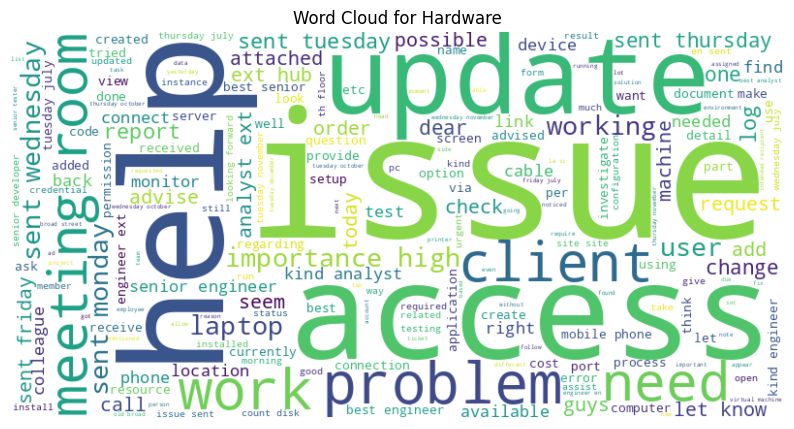

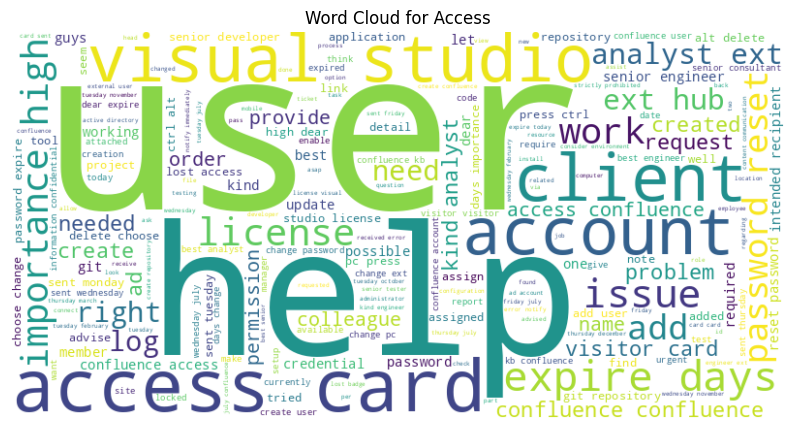

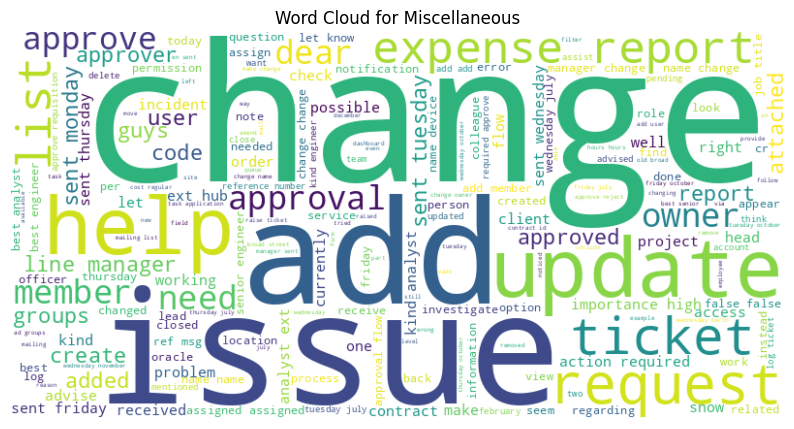

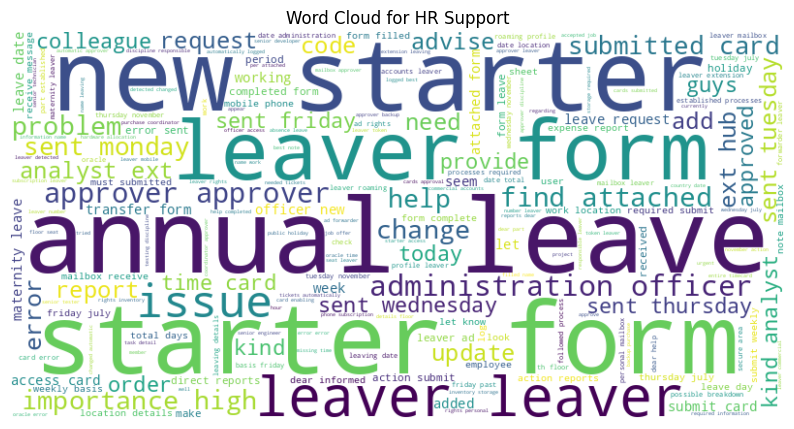

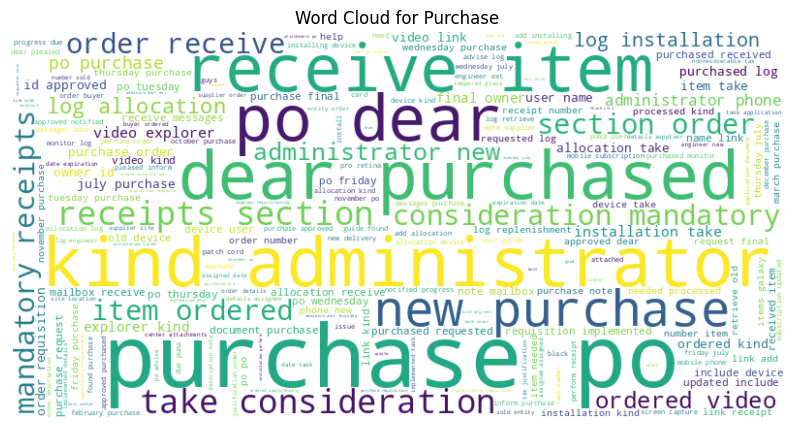

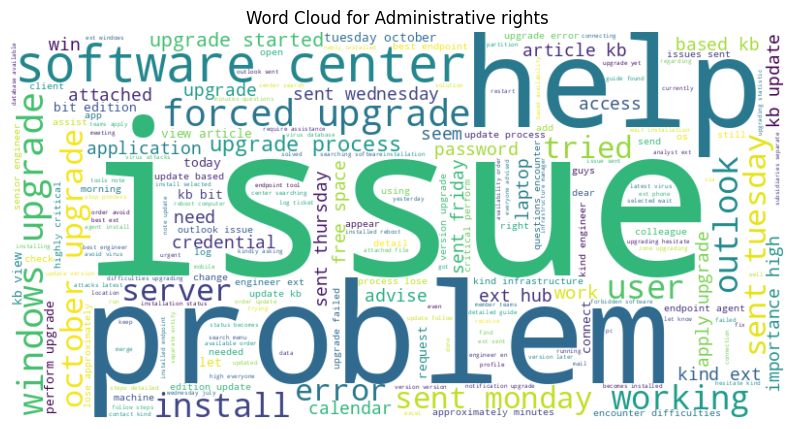

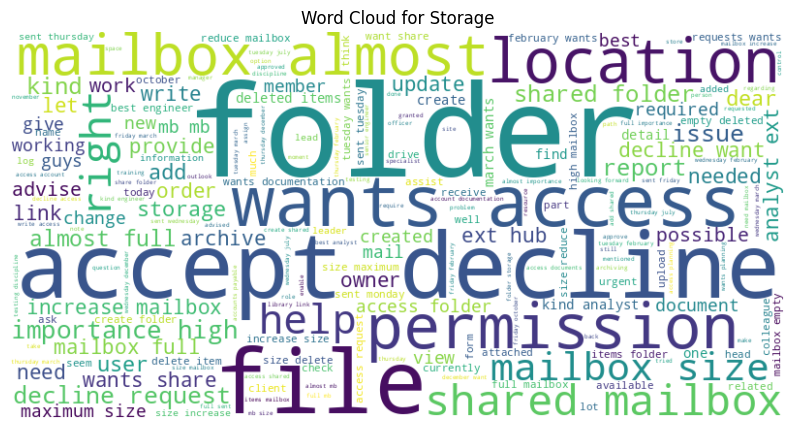

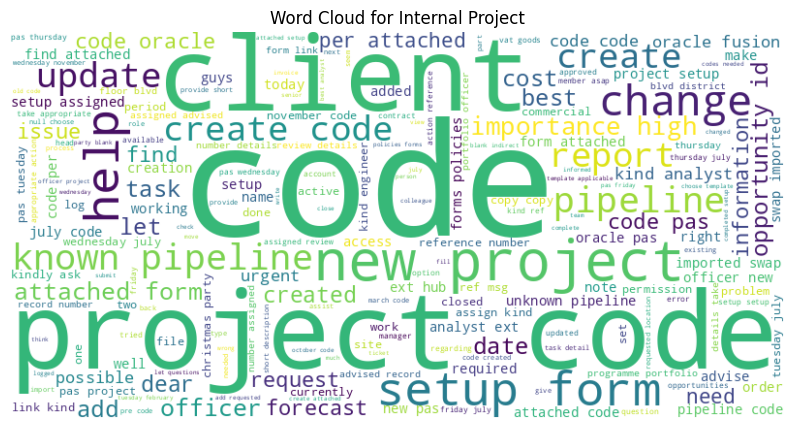

In [ ]:
# Function to generate word cloud for each category
!pip install wordcloud
# Importing the WordCloud class
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_cloud(category, text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {category}')
    plt.axis('off')
    plt.show()

# Generating and display word clouds for each category
categories = data['Topic_group'].unique()

for category in categories:
    category_text = ' '.join(data[data['Topic_group'] == category]['Cleaned_Document'])
    generate_word_cloud(category, category_text)